<a href="https://colab.research.google.com/github/coderAllDay/Twitter-Sentiment-Analysis/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True ,grid = False)

ModuleNotFoundError: ignored

In [ ]:
tweets_df = pd.read_csv('train.csv')

In [ ]:
tweets_df

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
tweets_df.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [ ]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [ ]:
tweets_df = tweets_df.drop(['id'], axis = 1)

In [ ]:
tweets_df

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]

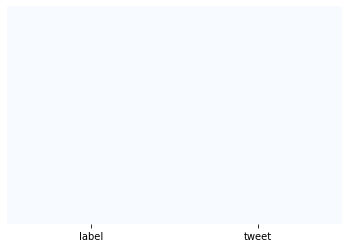

In [ ]:
sns.heatmap(tweets_df.isnull(), cmap = "Blues", cbar = False, yticklabels = False )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11b29ab8d0>]],
      dtype=object)

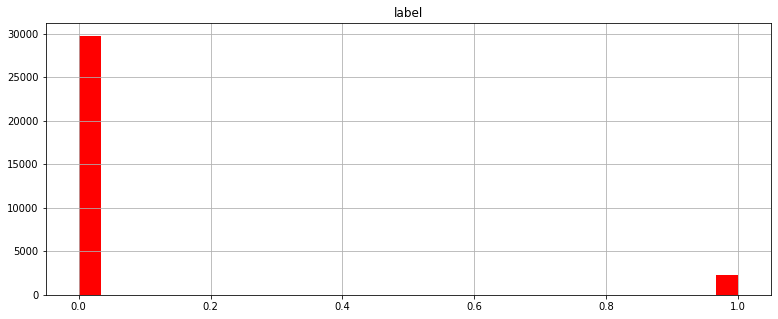

In [ ]:
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

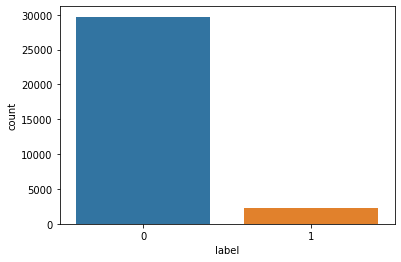

In [ ]:
sns.countplot(tweets_df['label'], label = 'Count')

In [ ]:
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [ ]:
tweets_df

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31960      1  @user #sikh #temple vandalised in in #calgary,...      67
31961      0                   thank you @user for you follow        32

[31962 rows x 3 columns]

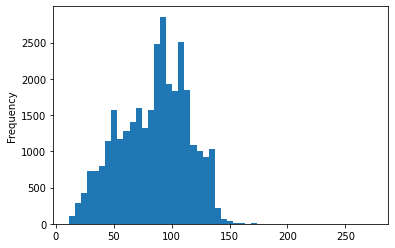

In [ ]:
tweets_df['length'].plot(bins = 50, kind = 'hist')

In [ ]:
tweets_df.describe()

label        length
count  31962.000000  31962.000000
mean       0.070146     84.739628
std        0.255397     29.455749
min        0.000000     11.000000
25%        0.000000     63.000000
50%        0.000000     88.000000
75%        0.000000    108.000000
max        1.000000    274.000000

In [ ]:
tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0]

'i love you '

In [ ]:
tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [ ]:
positive = tweets_df[tweets_df['label'] == 0]

In [ ]:
positive

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31956      0  off fishing tomorrow @user carnt wait first ti...      61
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31961      0                   thank you @user for you follow        32

[29720 rows x 3 columns]

In [ ]:
negative = tweets_df[tweets_df['label'] == 1]

In [ ]:
negative

label                                              tweet  length
13         1  @user #cnn calls #michigan middle school 'buil...      74
14         1  no comment!  in #australia   #opkillingbay #se...     101
17         1                             retweet if you agree!       22
23         1    @user @user lumpy says i am a . prove it lumpy.      47
34         1  it's unbelievable that in the 21st century we'...     104
...      ...                                                ...     ...
31934      1  lady banned from kentucky mall. @user  #jcpenn...      59
31946      1  @user omfg i'm offended! i'm a  mailbox and i'...      82
31947      1  @user @user you don't have the balls to hashta...     112
31948      1   makes you ask yourself, who am i? then am i a...      87
31960      1  @user #sikh #temple vandalised in in #calgary,...      67

[2242 rows x 3 columns]

In [ ]:
sentences = tweets_df['tweet'].tolist()

In [ ]:
sentences

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [ ]:
sentences_to_one_string = " ".join(sentences)

In [ ]:
sentences_to_one_string

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

In [ ]:
!pip install WordCloud

In [ ]:
from wordcloud import WordCloud

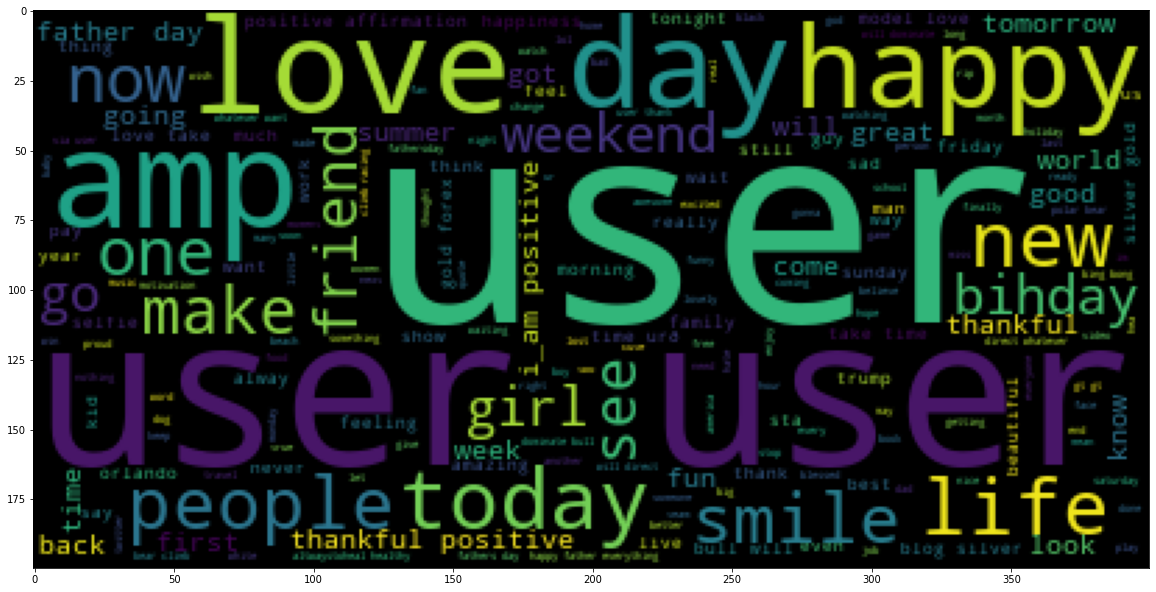

In [ ]:
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_to_one_string))

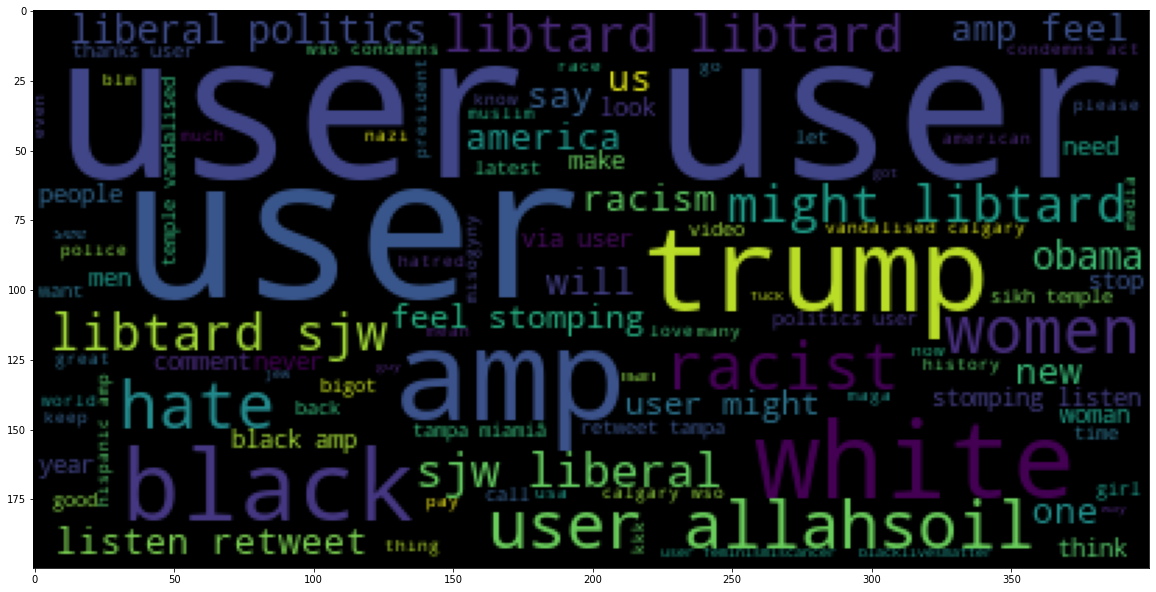

In [ ]:
positive_tweet = positive['tweet'].tolist()
positive_tweet_as_one_string = " ".join(positive_tweet)
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(positive_tweet_as_one_string))

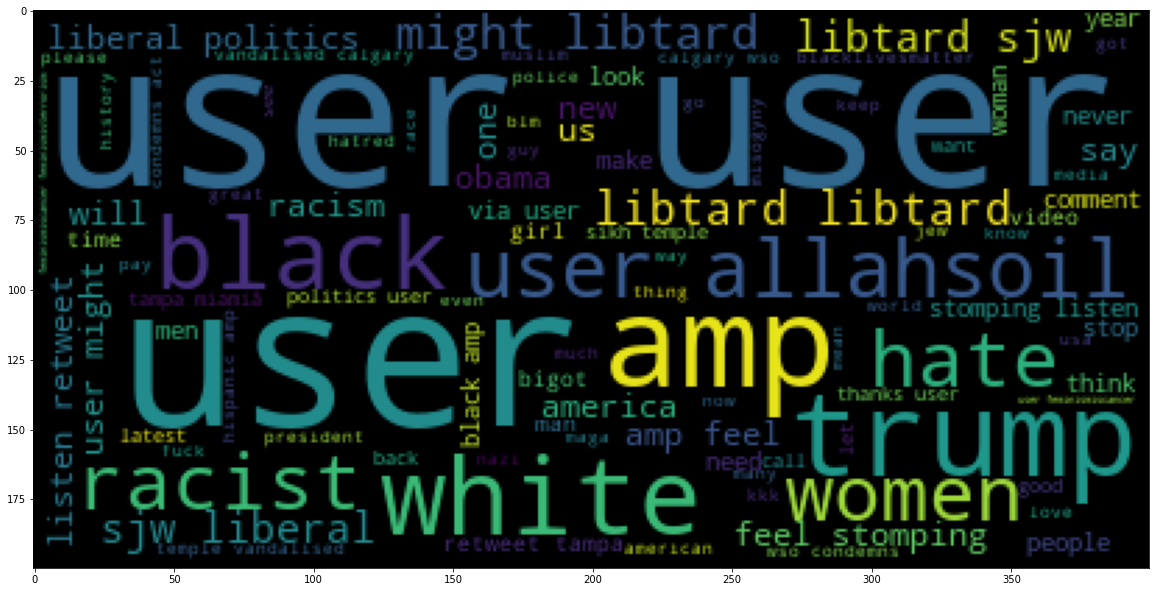

In [ ]:
negative_tweet = negative['tweet'].tolist()
negative_tweet_as_one_string = " ".join(negative_tweet)

plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(negative_tweet_as_one_string))

In [ ]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
string.digits

'0123456789'

In [ ]:
Text = '1.Good Morning :)0, hello my name is Vipul and Welcome....'

In [ ]:
Text_punc_removed = [ char for char in Text if char not in string.digits]
Text_punc_removed2 = [ char for char in Text_punc_removed if char not in string.punctuation]


In [ ]:
Text_punc_removed2

['G',
 'o',
 'o',
 'd',
 ' ',
 'M',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 ' ',
 'h',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'm',
 'y',
 ' ',
 'n',
 'a',
 'm',
 'e',
 ' ',
 'i',
 's',
 ' ',
 'V',
 'i',
 'p',
 'u',
 'l',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'W',
 'e',
 'l',
 'c',
 'o',
 'm',
 'e']

In [ ]:
Text_new = ''.join(Text_punc_removed2)

In [ ]:
Text_new

'Good Morning  hello my name is Vipul and Welcome'

In [ ]:
Text_punc_removed = []
for char in Text:
  if char not in string.punctuation + string.digits:
    Text_punc_removed.append(char)

In [ ]:
Text_punc_removed_join = ''.join(Text_punc_removed)

In [ ]:
Text_punc_removed_join

'Good Morning  hello my name is Vipul and Welcome'

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
Text_punc_removed_join_clean = [word for word in Text_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [ ]:
Text_punc_removed_join_clean


['Good', 'Morning', 'hello', 'name', 'Vipul', 'Welcome']

In [ ]:
mini_challenge = 'Here is the mini challenge for ya, this will help you to remove punctuations and cleaning the text'

In [ ]:
challenge = [char for char in mini_challenge if char not in string.punctuation + string.digits]
challenge = ''.join(challenge)
challenge1 = [word for word in challenge.split() if word.lower() not in stopwords.words('english')]

In [ ]:
challenge

'Here is the mini challenge for ya this will help you to remove punctuations and cleaning the text'

In [ ]:
challenge1

['mini',
 'challenge',
 'ya',
 'help',
 'remove',
 'punctuations',
 'cleaning',
 'text']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['That is a good shot', 'That is a wonderful shot', 'shot, good shot, wonderful shot']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [ ]:
print(vectorizer.get_feature_names())

['good', 'is', 'shot', 'that', 'wonderful']


In [ ]:
print(X.toarray())

[[1 1 1 1 0]
 [0 1 1 1 1]
 [1 0 3 0 1]]


In [ ]:
mini_challenge = ['Hello world', 'Hello Hello world','Hello world world world']

In [ ]:
vectorizer = CountVectorizer()
Y = vectorizer.fit_transform(mini_challenge)
print(Y.toarray())

[[1 1]
 [2 1]
 [1 3]]


In [ ]:
def message_cleaning(message):
  Text_punc_removed = [char for char in message if char not in string.punctuation]
  Text_punc_removed_join = ''.join(Text_punc_removed)
  Text_punc_clean = [word for word in Text_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
  Text_punc_clean_join = ' '.join(Text_punc_clean)
  return Text_punc_clean_join

In [ ]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [ ]:
tweets_df_clean[5]

'22 huge fan fare big talking leave chaos pay disputes get allshowandnogo'

In [ ]:
tweets_df['tweet'][5]

'[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  '

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning)

In [ ]:
tweets_vectorized = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df['tweet'])

In [ ]:
X = tweets_vectorized
Y = tweets_df['label']

In [ ]:
tweets_vectorized.shape

(31962, 131)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_classifier = MultinomialNB()
naive_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

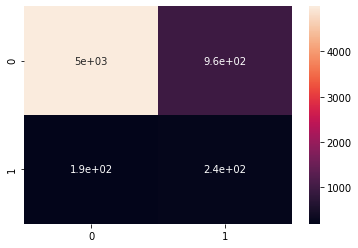

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = naive_classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True)


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      5962
           1       0.20      0.55      0.29       431

    accuracy                           0.82      6393
   macro avg       0.58      0.69      0.59      6393
weighted avg       0.91      0.82      0.86      6393

